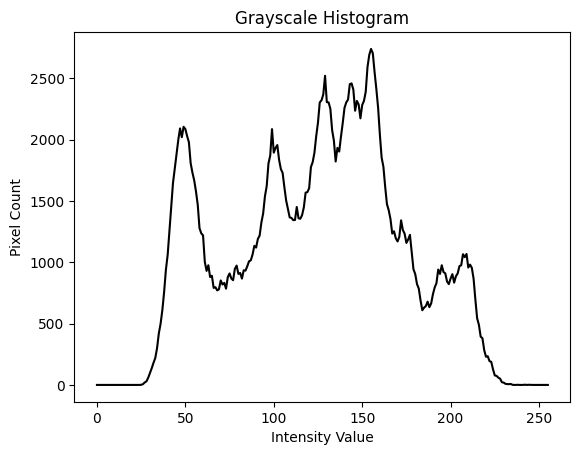

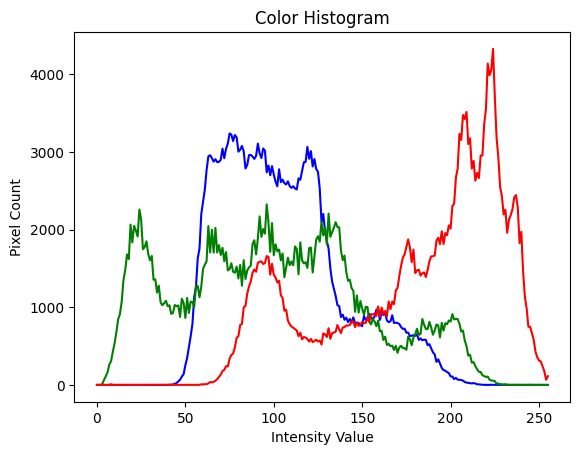

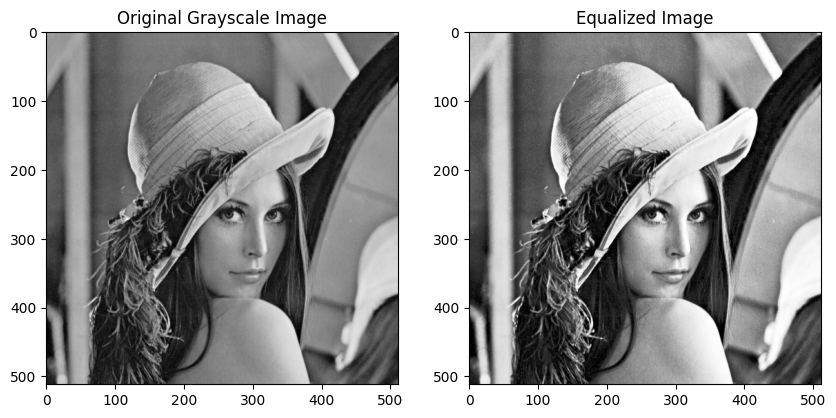

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image, color=False):
    """
    Computes and displays the histogram of a grayscale or color image.

    Parameters:
    - image: Input image (grayscale or color)
    - color: Boolean, if True processes a color image channel-wise.
    """
    if color:
        colors = ('b', 'g', 'r')
        for i, col in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
        plt.title("Color Histogram")
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
        plt.title("Grayscale Histogram")

    plt.xlabel("Intensity Value")
    plt.ylabel("Pixel Count")
    plt.show()

def histogram_equalization(image):
    """
    Enhances the contrast of an image using histogram equalization.

    Parameters:
    - image: Grayscale image

    Returns:
    - Equalized image
    """
    return cv2.equalizeHist(image)

# Load Image
image_color = cv2.imread("color.png")  # Replace with your image
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)

# Compute Histograms
compute_histogram(image_gray, color=False)  # Grayscale histogram
compute_histogram(image_color, color=True)  # Color histogram

# Histogram Equalization
equalized_image = histogram_equalization(image_gray)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.show()


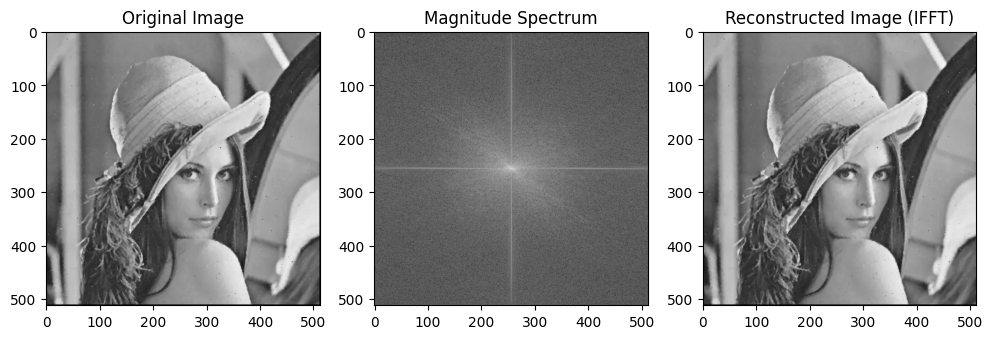

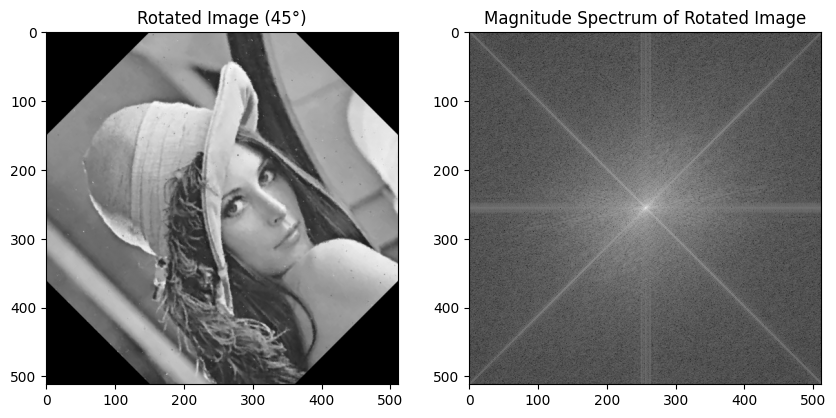

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fft_image(image):
    """
    Computes and displays the Fast Fourier Transform (FFT) of an image.

    Parameters:
    - image: Grayscale image

    Returns:
    - Magnitude spectrum
    - FFT-transformed image
    """
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft_shift, magnitude_spectrum

def ifft_image(dft_shift):
    """
    Computes the Inverse FFT (IFFT) to reconstruct the original image.

    Parameters:
    - dft_shift: Fourier-transformed image

    Returns:
    - Reconstructed image
    """
    dft_ishift = np.fft.ifftshift(dft_shift)
    reconstructed_image = np.fft.ifft2(dft_ishift)
    return np.abs(reconstructed_image)

# Load Image (Grayscale)
image_gray = cv2.imread("grey.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply FFT
dft_shift, magnitude_spectrum = fft_image(image_gray)

# Apply IFFT
reconstructed_image = ifft_image(dft_shift)

# Display Original, Magnitude Spectrum, and Reconstructed Image
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")

plt.subplot(1, 3, 3)
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image (IFFT)")

plt.show()

# Rotation Property of Fourier Transform
angle = 45
(h, w) = image_gray.shape
center = (w // 2, h // 2)

# Rotate image
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image_gray, rotation_matrix, (w, h))

# Compute FFT for rotated image
dft_rotated, magnitude_spectrum_rotated = fft_image(rotated_image)

# Display rotated image and its magnitude spectrum
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(rotated_image, cmap='gray')
plt.title("Rotated Image (45°)")

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum_rotated, cmap='gray')
plt.title("Magnitude Spectrum of Rotated Image")

plt.show()


In [ ]:
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])